# Tennis Ruminations + Wimbledon Preview

Current tennis broadcasts are loaded with statistics, and it's often hard to decipher which are most important. For example, we see graphics like the one here: 

![graphic](images/tennis_graphic.jpg)

We also see mid-match graphics, such as player tiebreak records when the match is headed for a tiebreak. (This one has always been a head-scratcher for me in particular, as I've wondered if tiebreak history is actually a good predictor of future tiebreak performance). 

Anyway, while the graphics may look nice and give the commentators talking material, it's often difficult to know which figures actually matter. In this article, I answer each of the four questions below that I've always wondered about:

1. Is it more important to win points on your 1st or 2nd serve? 

2. Is it more important to hold or break serve? 

3. How important is it to win tiebreaks? 

4. Free points: How valuable are aces? How detrimental are double faults?

As a bonus, I examine how the eight male Wimbledon quarterfinalists (Novak Djokovic, Marton Fucsovics, Karen Khachanov, Denis Shapovalov, Felix Auger-Aliassime, Matteo Berrettini, Roger Federer, and Hubert Hurkacz) have shaped up in 2021 in these areas.

I use [Tennis Abstract](http://www.tennisabstract.com/) data from 2019-2021. Unfortunately, the data do not include this year's Wimbledon since the tournament has not been completed.

In [23]:
# Imports
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Scraped 2019-2021 data
tennis = pd.read_csv("../data/tennis.csv").iloc[:, 1:]
tennis.head()

,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,...,TBs,TB W%,TB/S,Sets,S W%,Gms,G W%,Time/Mt,Min/Set,Sec/Pt
0,1.0,Novak Djokovic,65.0,0.831,0.695,0.695,373.0,0.077,166.0,0.034,...,19.0,0.737,0.109,174.0,0.793,1626.0,0.601,111,41.6,43.3
1,2.0,Daniil Medvedev,79.0,0.734,0.671,0.660,690.0,0.117,254.0,0.043,...,33.0,0.697,0.163,202.0,0.703,1934.0,0.560,105,40.9,40.9
2,3.0,Rafael Nadal,59.0,0.881,0.701,0.702,269.0,0.063,117.0,0.027,...,16.0,0.625,0.101,158.0,0.829,1435.0,0.631,123,45.9,48.8
3,4.0,Stefanos Tsitsipas,78.0,0.679,0.679,0.668,554.0,0.086,174.0,0.027,...,45.0,0.711,0.220,205.0,0.639,2066.0,0.530,116,44.2,41.8
4,5.0,Dominic Thiem,64.0,0.734,0.670,0.668,304.0,0.062,136.0,0.028,...,29.0,0.552,0.177,164.0,0.646,1606.0,0.539,113,44.2,43.5


These data include 148 player-seasons of serve, return, and break data from [Tennis Abstract](http://www.tennisabstract.com/). The relevant years are 2019-2021, and I defined a player-season as a year in which a player played at least 6 ATP matches. Why 6? Federer only played 6 matches last year, and he is a key part of this analysis. Why 148? Tennis Abstract includes stats for the **current** top 50 players in the world, even if they weren't top 50 in previous years. Since Sebastian Korda (current #50 in the world) and Aslan Karatsev (current #24) played fewer than 6 ATP matches in 2019, those two player-seasons were filtered out.

In [25]:
# 2021 data
tennis_2021 = tennis.tail(50)

# Current Wimbledon Quarterfinalists
qfs = ["Novak Djokovic ", "Marton Fucsovics ", "Karen Khachanov ", "Denis Shapovalov ", "Felix Auger Aliassime ",
      "Matteo Berrettini ", "Roger Federer ", "Hubert Hurkacz "]

# 2021 quarterfinalist data
tennis_2021_qfs = tennis_2021[tennis_2021["Player"].isin(qfs)].reset_index(drop=True)
tennis_2021_qfs

,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,...,TBs,TB W%,TB/S,Sets,S W%,Gms,G W%,Time/Mt,Min/Set,Sec/Pt
0,1.0,Novak Djokovic,30.0,0.900,0.674,0.670,209.0,0.078,85.0,0.032,...,15.0,0.467,0.165,91.0,0.769,857.0,0.611,142,46.8,45.8
1,8.0,Roger Federer,8.0,0.625,0.674,0.648,67.0,0.085,4.0,0.005,...,6.0,0.833,0.240,25.0,0.640,253.0,0.514,128,41.0,38.6
2,9.0,Matteo Berrettini,32.0,0.813,0.710,0.680,313.0,0.133,43.0,0.018,...,16.0,0.750,0.200,80.0,0.750,781.0,0.567,109,43.8,42.8
3,12.0,Denis Shapovalov,31.0,0.581,0.676,0.696,251.0,0.105,176.0,0.073,...,14.0,0.357,0.184,76.0,0.579,770.0,0.539,115,46.7,43.6
4,18.0,Hubert Hurkacz,26.0,0.577,0.657,0.635,211.0,0.107,52.0,0.026,...,11.0,0.727,0.172,64.0,0.578,634.0,0.508,104,42.4,40.7
5,19.0,Felix Auger Aliassime,33.0,0.606,0.674,0.670,271.0,0.114,119.0,0.050,...,16.0,0.375,0.200,80.0,0.600,772.0,0.543,109,45.1,45.4
6,29.0,Karen Khachanov,30.0,0.533,0.646,0.635,190.0,0.073,63.0,0.024,...,20.0,0.550,0.247,81.0,0.568,795.0,0.514,121,44.7,41.6
7,48.0,Marton Fucsovics,31.0,0.613,0.636,0.651,101.0,0.039,116.0,0.044,...,21.0,0.524,0.256,82.0,0.549,801.0,0.516,126,47.7,44.0


These data are the same statistics as above, just filtered by our 2021 Wimbledon quarterfinalists.

In [26]:
# Helper analysis functions
from sklearn.linear_model import LinearRegression

# Runs simple linear regression and outputs results
def regression_runner(x, y):
    X = pd.DataFrame(tennis[x])
    fit = LinearRegression().fit(X, y)
    R_square = "The R-squared value for " + str(x) + " is: " + str(fit.score(X, y))
    Coefficient = "The coefficient is: " + str(fit.coef_)
    Intercept = "The intercept is: " + str(fit.intercept_)
    print(R_square)
    print(Coefficient)
    print(Intercept)
    
# Take average for stat of interest and make stat+ (# of percentage points better or worse than avg. from top 50)
def stat_plus(x, avg):
    x_plus = x + "+"
    tennis_2021_qfs[x_plus] = (tennis_2021_qfs[x] - avg) * 100
    return tennis_2021_qfs.loc[:, ["Rk", "Player", x, x_plus]].sort_values(x, ascending=False).reset_index(drop=True)

### 1. Is it more important to win 1st serve points or 2nd serve points?

To answer this question I will regress match win percentage on each of percent 1st serve points won (1st%) and percent 2nd serve points won EXCLUDING double faults (2%-InP). I exclude double faults since 1) a double fault is an automatic loss of point and would therefore inflate the importance of the second serve, and 2) I examine double faults separately below.

In [27]:
x1 = "1st%"
x1_avg = .72
x2 = "2%-InP"
x2_avg = .571
y = tennis["M W%"]
regression_runner(x1, y)
regression_runner(x2, y)

The R-squared value for 1st% is: 0.14996692865122707
The coefficient is: [1.15122159]
The intercept is: -0.24579119515494874
The R-squared value for 2%-InP is: 0.28796687648667796
The coefficient is: [2.08882619]
The intercept is: -0.6038810828043057


These results indicate that winning 2nd serve points is more beneficial than winning first serve points. In fact, winning 1% more second serve points is worth, on average, about a 2% increase in match win percent. Meanwhile, winning 1% more first serve points is only worth a bit more than 1% more match wins.

In [28]:
stat_plus(x2, x2_avg)

,Rk,Player,2%-InP,2%-InP+
0,12.0,Denis Shapovalov,0.652,8.1
1,48.0,Marton Fucsovics,0.611,4.0
2,1.0,Novak Djokovic,0.609,3.8
3,19.0,Felix Auger Aliassime,0.599,2.8
4,8.0,Roger Federer,0.576,0.5
5,18.0,Hubert Hurkacz,0.560,-1.1
6,9.0,Matteo Berrettini,0.559,-1.2
7,29.0,Karen Khachanov,0.555,-1.6


Next we have a table showing percent 2nd serve points won (2%-InP, again excluding double faults), and I've defined `2%-InP+` as the number of percentage points above (or below) average these players are, where the average is taken from the top 50 ranked players in the world. We see that Denis Shapovalov wins 8% more 2nd serve points than average when he gets it in, which happens to be 2nd best on the tour behind only big server Milos Raonic. Marton Fucsovics, Novak Djokovic, and Felix Auger-Aliassime are also notably good on their second serves.

### 2. Is holding or breaking serve more important? 

I take the same approach as above, where Hld% is hold serve rate and Brk% is break rate.

In [29]:
x1 = "Hld%"
x1_avg = .808
x2 = "Brk%"
x2_avg = .249
regression_runner(x1, y)
regression_runner(x2, y)

The R-squared value for Hld% is: 0.36648435733107254
The coefficient is: [1.32512032]
The intercept is: -0.481504864628588
The R-squared value for Brk% is: 0.20854784529667847
The coefficient is: [1.04236037]
The intercept is: 0.3454105351535527


These results indicate that it is more important to hold serve than break serve. Winning 1% more of your service games leads to an average win percent increase of 1.3%, while breaking serve 1% more often leads to only a 1% increase in match win percent.

In [30]:
stat_plus(x1, x1_avg)

,Rk,Player,Hld%,Hld%+
0,9.0,Matteo Berrettini,0.903,9.5
1,12.0,Denis Shapovalov,0.880,7.2
2,8.0,Roger Federer,0.865,5.7
3,1.0,Novak Djokovic,0.855,4.7
4,19.0,Felix Auger Aliassime,0.846,3.8
5,18.0,Hubert Hurkacz,0.832,2.4
6,29.0,Karen Khachanov,0.827,1.9
7,48.0,Marton Fucsovics,0.790,-1.8


In 2021, Matteo Berrettini has been the best at holding serve by a considerable margin. He holds serve 9.5% more than the average top 50 player, and 2.3% more than Denis Shapovalov, the next best among the Wimbledon quarterfinalists. Among the entire ATP top 50, he is 3rd best in hold rate behind only serve bots John Isner and Milos Raonic. Marton Fucsovics is the only quarterfinalist below average at holding serve. 

### 3. How important is it to win tiebreaks? 

We answer this using tiebreak win rate (TB W%).

In [31]:
x = "TB W%"
x_avg = .534
regression_runner(x, y)

The R-squared value for TB W% is: 0.11506170011881889
The coefficient is: [0.27522061]
The intercept is: 0.4466724089332711


Of all regressions fun so far, we see the lowest R-squared for tiebreak win percent. Further, we see a 1% increase in tiebreak win rate only contributes to a 0.27% average increase in match win rate. 

#### 3a. Does tiebreak history predict future tiebreak performance?
To answer this, we can run some quick correlations.

In [32]:
# Correlation study
tennis_19 = tennis.head(48)  # 2019 data
tennis_20 = tennis.iloc[48:98, :].drop([71, 97], axis = 0)  # 2020 data (dropped Karatsev and Korda so data line up)

In [33]:
print("The correlation between 2019 TB W% and 2020 TB W% is: " + str(tennis_19["TB W%"].corr(tennis_20["TB W%"].reset_index(drop=True))))

The correlation between 2019 TB W% and 2020 TB W% is: 0.0668851911068551


Above we see that the correlation between 2019 tiebreak win rate and 2020 tiebreak win rate is very weak at only 0.07.

In [34]:
print("The correlation between 2019 Hold% and 2020 TB W% is: " + str(tennis_19["Hld%"].corr(tennis_20["TB W%"].reset_index(drop=True))))

The correlation between 2019 Hold% and 2020 TB W% is: 0.1704912992782255


Here we see that 2019 hold rate has a higher correlation with 2020 tiebreak win rate, with r = 0.17. So, when you see those oh-so-often tiebreak records given on TV broadcasts, now you know to not pay them much attention and to instead examine something like hold rate. :)

We can also see this visually:

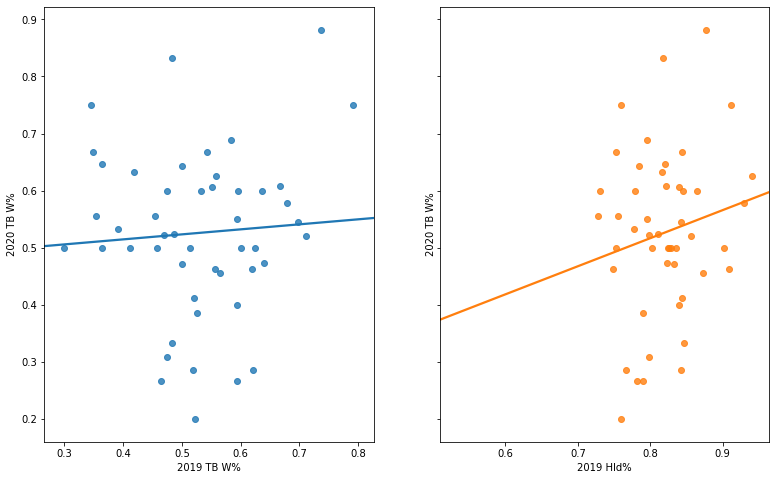

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize = (13, 8))
sns.regplot(x = tennis_19["TB W%"], y = tennis_20["TB W%"], ax = ax1, ci = None)
sns.regplot(x = tennis_19["Hld%"], y = tennis_20["TB W%"], ax = ax2, ci = None)

ax1.set_ylabel('2020 TB W%')
ax2.set_ylabel('2020 TB W%')
ax1.set_xlabel('2019 TB W%')
ax2.set_xlabel('2019 Hld%')

fig.savefig("../images/tiebreak_regressions.png");

The latter relationship is notably more positive.

In [36]:
stat_plus(x, x_avg)

,Rk,Player,TB W%,TB W%+
0,8.0,Roger Federer,0.833,29.9
1,9.0,Matteo Berrettini,0.750,21.6
2,18.0,Hubert Hurkacz,0.727,19.3
3,29.0,Karen Khachanov,0.550,1.6
4,48.0,Marton Fucsovics,0.524,-1.0
5,1.0,Novak Djokovic,0.467,-6.7
6,19.0,Felix Auger Aliassime,0.375,-15.9
7,12.0,Denis Shapovalov,0.357,-17.7


Interestingly, although Shapovalov holds serve considerably more than average, he has struggled mightily to win tiebreaks this year. Federer, Berrettini, and Hurkacz are notably better than average.

### 4. Free points: How valuable are aces? How detrimental are double faults?

Ace rate is Ace% and double fault rate is DF%.

In [37]:
x1 = "Ace%"
x1_avg = .076
x2 = "DF%"
x2_avg = .036
regression_runner(x1, y)
regression_runner(x2, y)

The R-squared value for Ace% is: 0.009169401286127865
The coefficient is: [0.24152877]
The intercept is: 0.5711241448023084
The R-squared value for DF% is: 0.07911118796404037
The coefficient is: [-2.24684786]
The intercept is: 0.674501827149806


From these regressions it's evident that the cost of giving a free point far outweighs the benefit of getting a free point. An increase in ace rate of 1% is associated with only a 0.24% increase in match win rate, while a 1% increase in double fault rate contributes to more than 2% fewer wins on average. By dividing the magnitude of the coefficients, we see DF% is almost 4x more important than Ace%. Hence, if one wants to hit more aces, they need to maintain at least a 4:1 ace to double fault ratio to make it worth the gamble.

Note that there is selection bias present here with the inclusion of huge servers like John Isner and Reilly Opelka, who naturally hit a ton of aces because of their height but also struggle because of it in other areas of the game. Hence, a more "normal" player actually would likely see better results from hitting more aces than this analysis indicates.

In [38]:
stat_plus(x2, x2_avg)

,Rk,Player,DF%,DF%+
0,12.0,Denis Shapovalov,0.073,3.7
1,19.0,Felix Auger Aliassime,0.050,1.4
2,48.0,Marton Fucsovics,0.044,0.8
3,1.0,Novak Djokovic,0.032,-0.4
4,18.0,Hubert Hurkacz,0.026,-1.0
5,29.0,Karen Khachanov,0.024,-1.2
6,9.0,Matteo Berrettini,0.018,-1.8
7,8.0,Roger Federer,0.005,-3.1


Among our quarterfinalists, we find Shapovalov doubles significantly more than the top 50 average, while Federer finds himself on the better extreme of the spectrum. Interestingly, despite Shapovalov's more frequent double faults, remember from earlier that his hold rate has still been quite good. 

In [41]:
X = pd.DataFrame(tennis.loc[:, ["DF%", "Ace%"]])
fit = LinearRegression().fit(X, y)
R_square = "The R-squared value is: " + str(fit.score(X, y))
Coefficient = "The coefficients are: " + str(fit.coef_)
Intercept = "The intercept is: " + str(fit.intercept_)
print(R_square)
print(Coefficient)
print(Intercept)

The R-squared value for is: 0.1022072987938265
The coefficient is: [-2.48182332  0.39043974]
The intercept is: 0.6502089893838514


# Conclusion

In this article, we've learned several interesting lessons: 1) Maximize the efficacy of your 2nd serve, 2) Worry about your own serve more than your opponent's, 3) Past tiebreak performance poorly predicts future tiebreak performance, and 4) Do not double fault.

It's also no coincidence that in the 2nd serve, hold, and double fault quarterfinalist analyses, at least five of the eight quarterfinalists are better than the top 50 average. It is only in the tiebreak analysis (the least important stat of this analysis) that we see a 50/50 split between above and below average.

# Further Work

In the future, it would be interesting to analyze rally data. In particular, I'd be curious to compare the effects of winners and unforced errors on match outcomes. I'd also like to look at rally length and see which players are best in short, medium, and long rallies. Last, it could be very beneficial to examine player serve tendencies based on match situation. For example, knowing where Djokovic likes to hit his first or second serve when facing break point could be tremendously advantageous to the returning player.